In [1]:
!pip install mlxtend --user
!pip install lightgbm --user
!pip install xgboost --user
!pip install plotly --user

     |████████████████████████████████| 1.3 MB 36.5 MB/s            
     |████████████████████████████████| 9.8 MB 116.2 MB/s            
     |████████████████████████████████| 297 kB 113.5 MB/s            
You should consider upgrading via the '/opt/conda/bin/python -m pip install --upgrade pip' command.
     |████████████████████████████████| 2.0 MB 31.9 MB/s            
You should consider upgrading via the '/opt/conda/bin/python -m pip install --upgrade pip' command.
     |████████████████████████████████| 193.6 MB 176 kB/s              
You should consider upgrading via the '/opt/conda/bin/python -m pip install --upgrade pip' command.
     |████████████████████████████████| 15.2 MB 32.5 MB/s            
You should consider upgrading via the '/opt/conda/bin/python -m pip install --upgrade pip' command.


In [2]:
import os

cwd=os.path.abspath('')
os.chdir('/mnt')
files=os.listdir(cwd)

In [3]:
import os
import pandas as pd
import scipy as sp
import numpy as np
import math
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sn
import pandas as pd
import numpy as np
from sklearn.svm import LinearSVC
from sklearn.feature_selection import SelectFromModel
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import KFold, cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import ElasticNetCV, LassoCV, RidgeCV
from datetime import datetime
from scipy.stats import skew  # for some statistics
from scipy.special import boxcox1p
from scipy.stats import boxcox_normmax
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import mean_squared_error
from mlxtend.regressor import StackingCVRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
import matplotlib.pyplot as plt
import scipy.stats as stats
import sklearn.linear_model as linear_model
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PowerTransformer
import warnings
warnings.filterwarnings('ignore')

In [4]:
def rmse(y, y_pred):
    return np.sqrt(np.mean((y - y_pred)**2))

def mae(y, y_pred):
    return np.mean(np.absolute(np.subtract(y, y_pred)))

Index(['CO2_kg_per_Ha', 'Total_Water_Applied_mm',
       'Crop_Protection_Application_Doses', 'Soil_Organic_Matter',
       'Yield_kg_per_Ha', 'N_as_Urea_kg_per_Ha', 'N_as_Nitrate_kg_per_Ha',
       'N_as_Ammonium_kg_per_Ha', 'P_as_Phosphorus_kg_per_Ha',
       'P_as_P2O5_kg_per_Ha', 'K_as_Potassium_kg_per_Ha',
       'K_as_K2O_kg_per_Ha'],
      dtype='object')


(array([ 11.,  31., 142., 200., 243.,  87.,  14.,   5.,   2.,   1.]),
 array([-3.0364116 , -2.24014269, -1.44387378, -0.64760488,  0.14866403,
         0.94493294,  1.74120184,  2.53747075,  3.33373966,  4.13000856,
         4.92627747]),
 <BarContainer object of 10 artists>)

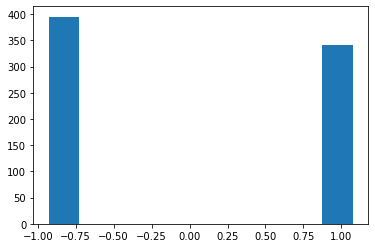

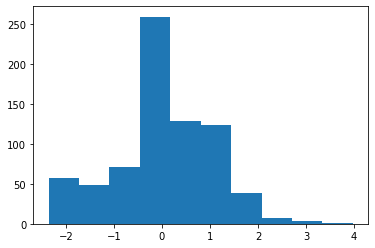

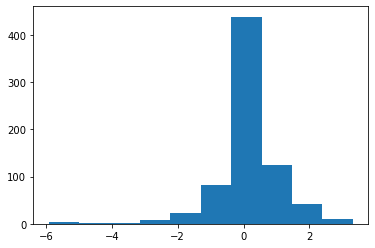

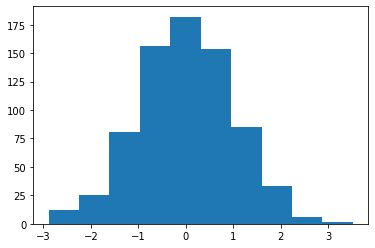

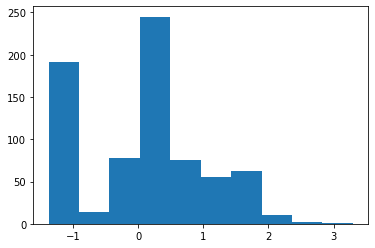

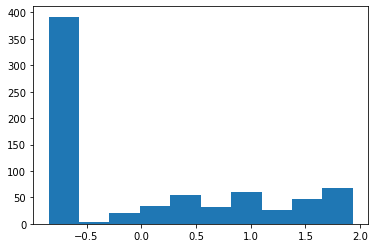

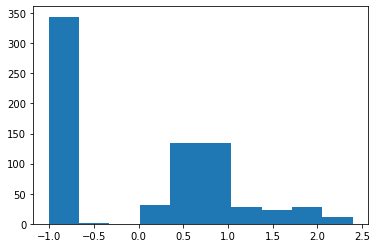

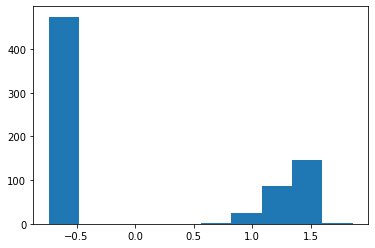

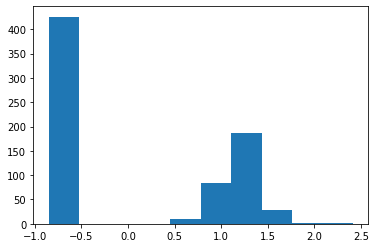

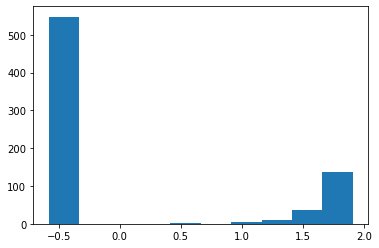

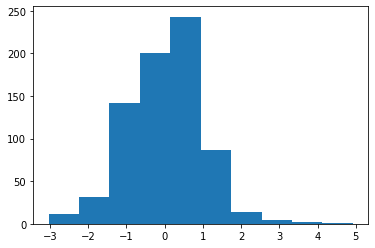

In [35]:
###############
### BUILD 1 ###
###############

#Yeo-Johnson Scaling
df = pd.read_csv('/mnt/Datasets/merged_df_1_27_23.csv').drop(columns = ['Unnamed: 0'])
df = df.drop(columns = ['Field_Name'])

print(df.columns)

#train/test split
train_CO2_kg_per_ha, test_CO2_kg_per_ha = train_test_split(df, test_size = 0.2, random_state = 60)

#x values
X_train_CO2_kg_per_ha = train_CO2_kg_per_ha.drop(columns = ['CO2_kg_per_Ha'])
X_test_CO2_kg_per_ha = test_CO2_kg_per_ha.drop(columns = ['CO2_kg_per_Ha'])

standard_scaler_X = StandardScaler().fit(X_train_CO2_kg_per_ha)
X_train_CO2_kg_per_ha = standard_scaler_X.transform(X_train_CO2_kg_per_ha)

power_transform_X = PowerTransformer(standardize = True).fit(X_train_CO2_kg_per_ha)
X_train_CO2_kg_per_ha = power_transform_X.transform(X_train_CO2_kg_per_ha)

X_test_CO2_kg_per_ha = standard_scaler_X.transform(X_test_CO2_kg_per_ha)
X_test_CO2_kg_per_ha = power_transform_X.transform(X_test_CO2_kg_per_ha)

plt.figure()
plt.hist(X_train_CO2_kg_per_ha[:,0])
plt.figure()
plt.hist(X_train_CO2_kg_per_ha[:,1])
plt.figure()
plt.hist(X_train_CO2_kg_per_ha[:,2])
plt.figure()
plt.hist(X_train_CO2_kg_per_ha[:,3])
plt.figure()
plt.hist(X_train_CO2_kg_per_ha[:,4])
plt.figure()
plt.hist(X_train_CO2_kg_per_ha[:,5])
plt.figure()
plt.hist(X_train_CO2_kg_per_ha[:,6])
plt.figure()
plt.hist(X_train_CO2_kg_per_ha[:,7])
plt.figure()
plt.hist(X_train_CO2_kg_per_ha[:,8])
plt.figure()
plt.hist(X_train_CO2_kg_per_ha[:,9])

#y_values
y_train_CO2_kg_per_ha = np.array(train_CO2_kg_per_ha['CO2_kg_per_Ha']).reshape(-1, 1)

mean_CO2_kg_per_ha = y_train_CO2_kg_per_ha.mean()

y_test_CO2_kg_per_ha = np.array(test_CO2_kg_per_ha['CO2_kg_per_Ha']).reshape(-1, 1)

standard_scaler_y = StandardScaler().fit(np.array(y_train_CO2_kg_per_ha))

y_train_CO2_kg_per_ha = standard_scaler_y.transform(y_train_CO2_kg_per_ha)

power_transform_y = PowerTransformer(standardize = False).fit(y_train_CO2_kg_per_ha)

y_train_CO2_kg_per_ha = power_transform_y.transform(y_train_CO2_kg_per_ha)

y_test_CO2_kg_per_ha = standard_scaler_y.transform(y_test_CO2_kg_per_ha)

y_test_CO2_kg_per_ha = power_transform_y.transform(y_test_CO2_kg_per_ha)

plt.figure()
plt.hist(y_train_CO2_kg_per_ha)

In [36]:
####Initialize K fold Cross validation
kfolds = KFold(n_splits = 10, shuffle = True, random_state = 42)

#####Grid Space for Lasso, Ridge, ElasticNet
alphas2 = [5e-05, 0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007, 0.0008]
alphas_alt = [14.5, 14.6, 14.7, 14.8, 14.9, 15, 15.1, 15.2, 15.3, 15.4, 15.5]
e_alphas = [0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007]
e_l1ratio = [0.8, 0.85, 0.9, 0.95, 0.99, 1]

####Model Building

model_names = ['OLS', 'Lasso', 'Ridge', 'ElasticNet', 'SVR', 'Lightgbm', 'GBR', 'XGBoost']
models = [linear_model.LinearRegression(), \
            LassoCV(max_iter = int(1e7), alphas = alphas2, random_state = 42, cv = kfolds), \
                  RidgeCV(alphas = alphas_alt, cv = kfolds), \
                  ElasticNetCV(max_iter = int(1e7), alphas = e_alphas, cv = kfolds, l1_ratio = e_l1ratio), \
                  SVR(C = 20, epsilon = 0.008, gamma = 0.0003), \
                  LGBMRegressor(objective='regression', num_leaves = 4, learning_rate = 0.01, n_estimators = 5000, max_bin = 200, bagging_fraction = 0.75, \
                                bagging_freq = 5, bagging_seed = 7, feature_fraction = 0.2, feature_fraction_seed = 7, verbose = -1), \
                  GradientBoostingRegressor(n_estimators = 5000, learning_rate = 0.05, max_depth = 4, max_features = 'sqrt', min_samples_leaf = 15, \
                                            min_samples_split = 10, loss = 'huber', random_state = 42), \
                  XGBRegressor(learning_rate = 0.005, n_estimators = 10000, max_depth = 3, min_child_weight = 0, gamma = 0, subsample = 0.7, \
                               colsample_bytree = 0.7, objective = 'reg:linear', nthread = -1, scale_pos_weight = 1, seed = 27, reg_alpha = 0.00006)
         ]

fitted_models = []
Test_MAE_models = []

for model in models:
    fitted_models.append(model.fit(X_train_CO2_kg_per_ha, y_train_CO2_kg_per_ha))
    inv_transform_y_actuals = standard_scaler_y.inverse_transform(power_transform_y.inverse_transform(y_test_CO2_kg_per_ha).reshape(-1, 1))
    inv_transformed_preds = standard_scaler_y.inverse_transform(power_transform_y.inverse_transform(fitted_models[models.index(model)].predict(X_test_CO2_kg_per_ha).reshape(-1,1)))                                             
    Test_MAE_models.append(mae(inv_transform_y_actuals, inv_transformed_preds))

[LightGBM] [Warning] feature_fraction is set=0.2, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] bagging_fraction is set=0.75, subsample=1.0 will be ignored. Current value: bagging_fraction=0.75
[22:26:22] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


OLS
MAE on test data: 320.6384730193182


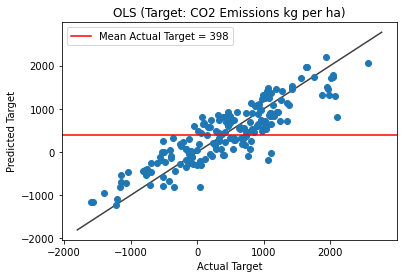

Lasso
MAE on test data: 320.7600999402769


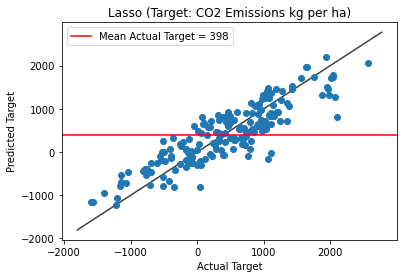

Ridge
MAE on test data: 319.7938121066517


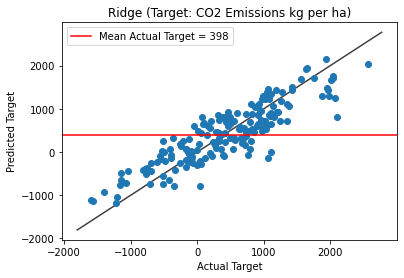

ElasticNet
MAE on test data: 320.7391428605521


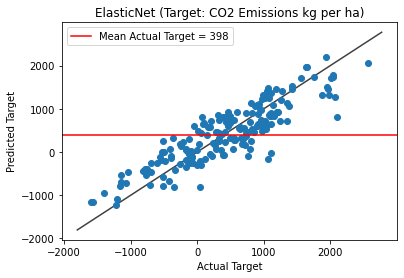

SVR
MAE on test data: 320.68293844539625


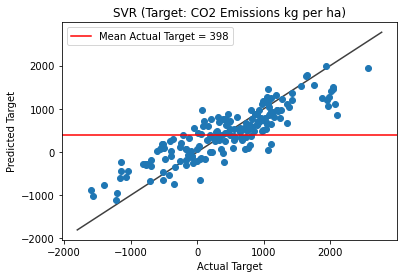

Lightgbm
MAE on test data: 241.05210823955017


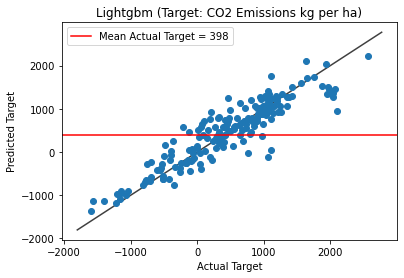

GBR
MAE on test data: 228.59490804339245


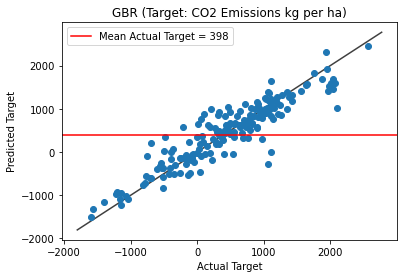

XGBoost
MAE on test data: 219.70274719860245


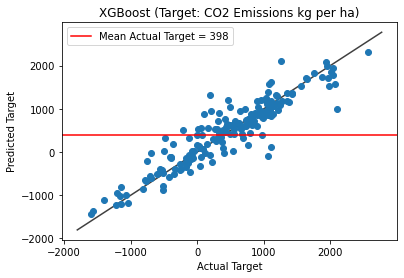

In [37]:
for model_name in model_names:
    print(model_name)
    print('MAE on test data: ' + str(Test_MAE_models[model_names.index(model_name)]))
    inv_transformed_y_actuals = standard_scaler_y.inverse_transform(power_transform_y.inverse_transform(y_test_CO2_kg_per_ha).reshape(-1, 1))
    inv_transformed_preds = standard_scaler_y.inverse_transform(power_transform_y.inverse_transform(fitted_models[model_names.index(model_name)].predict(X_test_CO2_kg_per_ha).reshape(-1,1)))
    fig, ax = plt.subplots()
    ax.axhline(y=mean_CO2_kg_per_ha, color='r', linestyle='-', label = 'Mean Actual Target = ' + str(int(mean_CO2_kg_per_ha)))
    ax.scatter(inv_transformed_y_actuals, inv_transformed_preds)
    lims = [
        np.min([ax.get_xlim(), ax.get_ylim()]),
        np.max([ax.get_xlim(), ax.get_ylim()]),
    ]
    ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
    plt.xlabel('Actual Target')
    plt.ylabel('Predicted Target')
    plt.title(model_name + ' (Target: CO2 Emissions kg per ha)')
    plt.legend()
    plt.show()

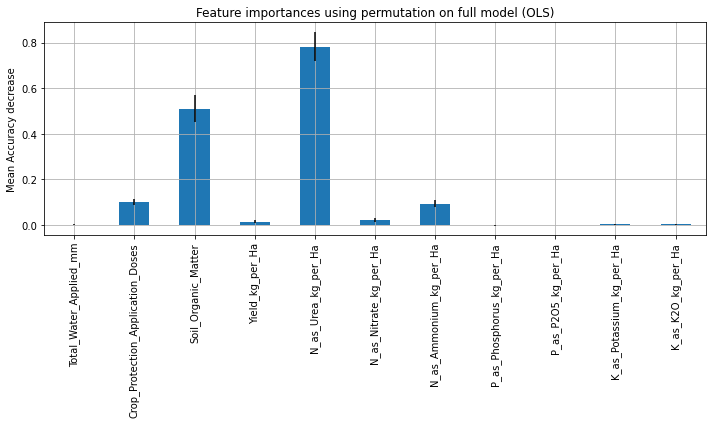

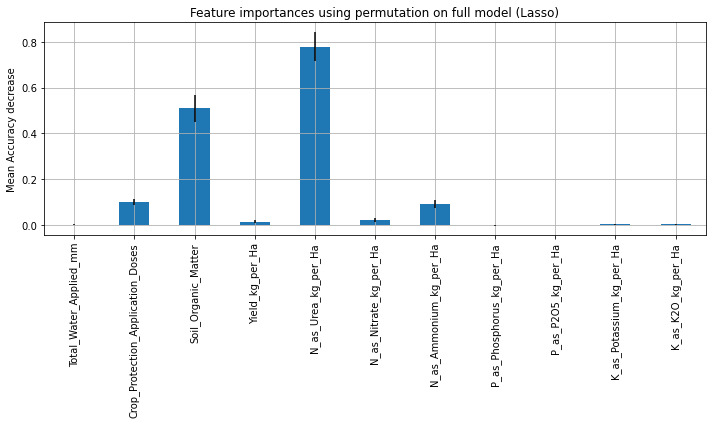

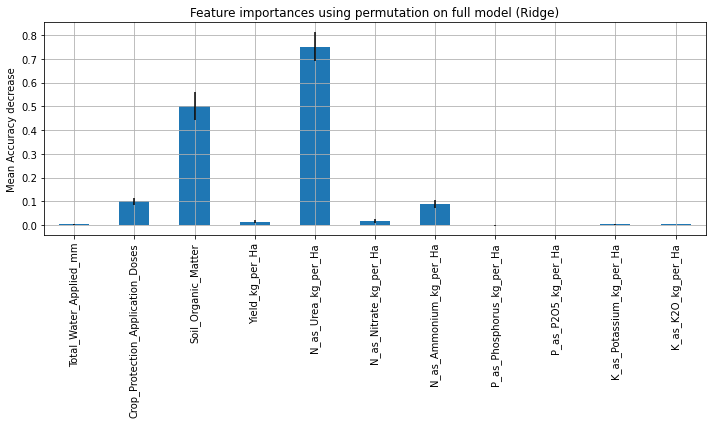

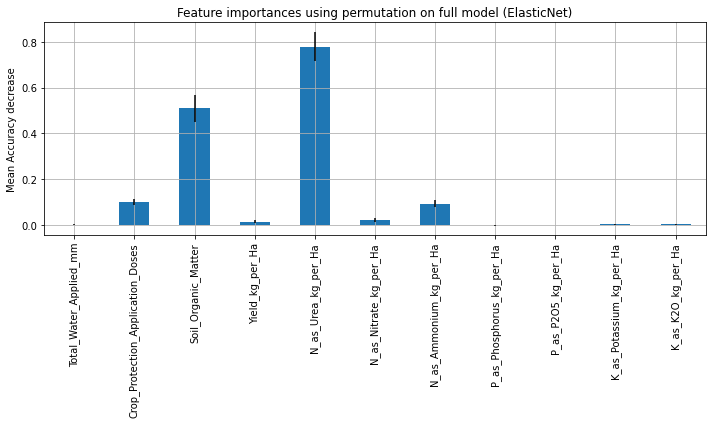

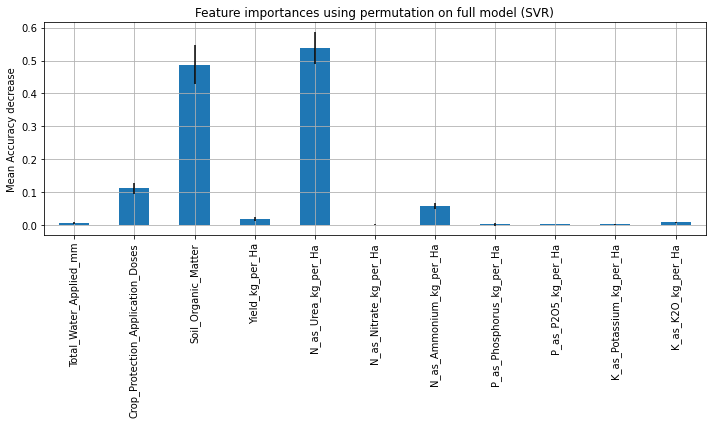

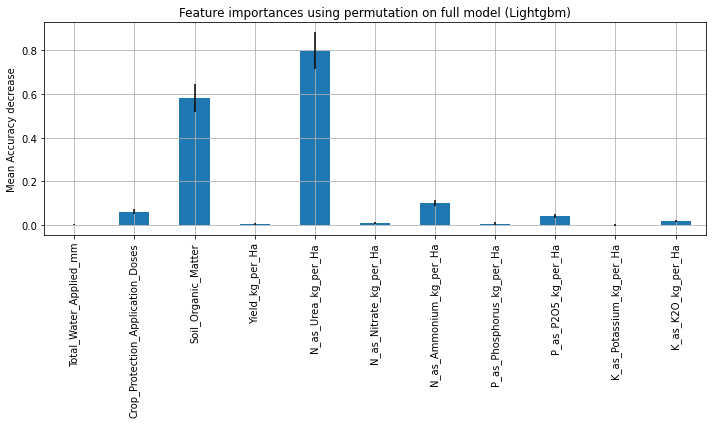

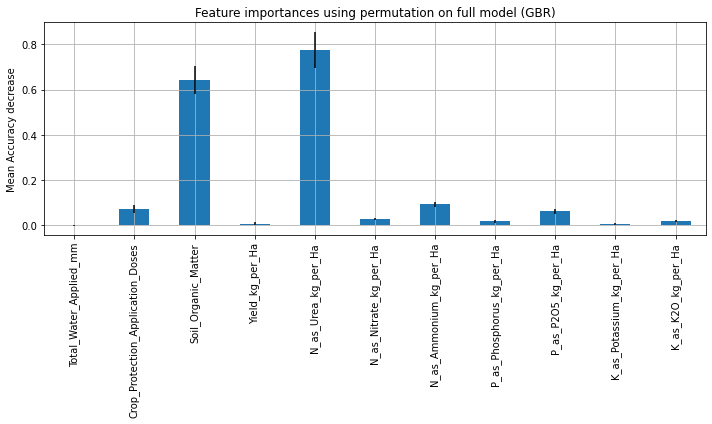

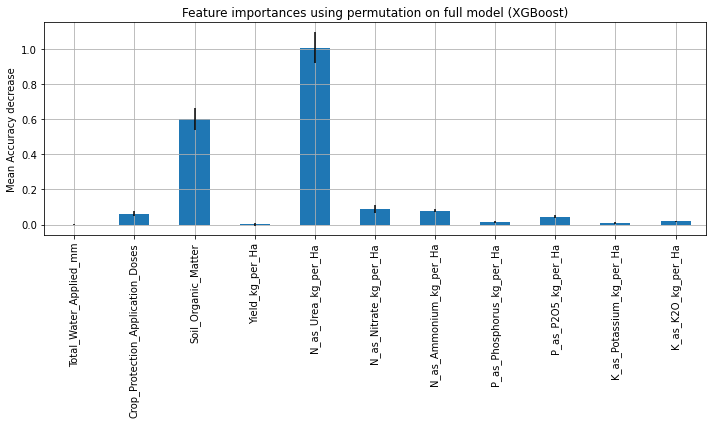

In [38]:
from sklearn.inspection import permutation_importance

for i in range(len(fitted_models)):
    feature_names = train_CO2_kg_per_ha.drop(columns = ['CO2_kg_per_Ha']).columns

    result = permutation_importance(
        fitted_models[i], X_test_CO2_kg_per_ha, y_test_CO2_kg_per_ha, n_repeats=10, random_state=42, n_jobs=2
    )

    model_importances = pd.Series(result.importances_mean, index = feature_names)
    
    fig, ax = plt.subplots(figsize=(10, 6))
    model_importances.plot.bar(yerr = result.importances_std, ax = ax)
    ax.set_title("Feature importances using permutation on full model (" + str(model_names[i]) + ')')
    ax.set_ylabel("Mean Accuracy decrease")
    plt.grid()
    fig.tight_layout()
    plt.show()

In [39]:
###############
### BUILD 2 ###
###############

#Yeo-Johnson Scaling
df = pd.read_csv('/mnt/Datasets/merged_df_1_27_23.csv').drop(columns = ['Unnamed: 0'])
df = df.drop(columns = ['Field_Name'])[['CO2_kg_per_Ha', 'Yield_kg_per_Ha']]

print(df.columns)

#train/test split
train_CO2_kg_per_ha, test_CO2_kg_per_ha = train_test_split(df, test_size = 0.2, random_state = 60)

#x values
X_train_CO2_kg_per_ha = train_CO2_kg_per_ha.drop(columns = ['CO2_kg_per_Ha'])
X_test_CO2_kg_per_ha = test_CO2_kg_per_ha.drop(columns = ['CO2_kg_per_Ha'])

standard_scaler_X = StandardScaler().fit(X_train_CO2_kg_per_ha)
X_train_CO2_kg_per_ha = standard_scaler_X.transform(X_train_CO2_kg_per_ha)

power_transform_X = PowerTransformer(standardize = True).fit(X_train_CO2_kg_per_ha)
X_train_CO2_kg_per_ha = power_transform_X.transform(X_train_CO2_kg_per_ha)

X_test_CO2_kg_per_ha = standard_scaler_X.transform(X_test_CO2_kg_per_ha)
X_test_CO2_kg_per_ha = power_transform_X.transform(X_test_CO2_kg_per_ha)

#y_values
y_train_CO2_kg_per_ha = np.array(train_CO2_kg_per_ha['CO2_kg_per_Ha']).reshape(-1, 1)

mean_CO2_kg_per_ha = y_train_CO2_kg_per_ha.mean()

y_test_CO2_kg_per_ha = np.array(test_CO2_kg_per_ha['CO2_kg_per_Ha']).reshape(-1, 1)

standard_scaler_y = StandardScaler().fit(np.array(y_train_CO2_kg_per_ha))

y_train_CO2_kg_per_ha = standard_scaler_y.transform(y_train_CO2_kg_per_ha)

power_transform_y = PowerTransformer(standardize = False).fit(y_train_CO2_kg_per_ha)

y_train_CO2_kg_per_ha = power_transform_y.transform(y_train_CO2_kg_per_ha)

y_test_CO2_kg_per_ha = standard_scaler_y.transform(y_test_CO2_kg_per_ha)

y_test_CO2_kg_per_ha = power_transform_y.transform(y_test_CO2_kg_per_ha)

Index(['CO2_kg_per_Ha', 'Yield_kg_per_Ha'], dtype='object')


In [40]:
####Initialize K fold Cross validation
kfolds = KFold(n_splits = 10, shuffle = True, random_state = 42)

#####Grid Space for Lasso, Ridge, ElasticNet
alphas2 = [5e-05, 0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007, 0.0008]
alphas_alt = [14.5, 14.6, 14.7, 14.8, 14.9, 15, 15.1, 15.2, 15.3, 15.4, 15.5]
e_alphas = [0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007]
e_l1ratio = [0.8, 0.85, 0.9, 0.95, 0.99, 1]

####Model Building

model_names = ['OLS', 'Lasso', 'Ridge', 'ElasticNet', 'SVR', 'Lightgbm', 'GBR', 'XGBoost']
models = [linear_model.LinearRegression(), \
            LassoCV(max_iter = int(1e7), alphas = alphas2, random_state = 42, cv = kfolds), \
                  RidgeCV(alphas = alphas_alt, cv = kfolds), \
                  ElasticNetCV(max_iter = int(1e7), alphas = e_alphas, cv = kfolds, l1_ratio = e_l1ratio), \
                  SVR(C = 20, epsilon = 0.008, gamma = 0.0003), \
                  LGBMRegressor(objective='regression', num_leaves = 4, learning_rate = 0.01, n_estimators = 5000, max_bin = 200, bagging_fraction = 0.75, \
                                bagging_freq = 5, bagging_seed = 7, feature_fraction = 0.2, feature_fraction_seed = 7, verbose = -1), \
                  GradientBoostingRegressor(n_estimators = 5000, learning_rate = 0.05, max_depth = 4, max_features = 'sqrt', min_samples_leaf = 15, \
                                            min_samples_split = 10, loss = 'huber', random_state = 42), \
                  XGBRegressor(learning_rate = 0.005, n_estimators = 10000, max_depth = 3, min_child_weight = 0, gamma = 0, subsample = 0.7, \
                               colsample_bytree = 0.7, objective = 'reg:linear', nthread = -1, scale_pos_weight = 1, seed = 27, reg_alpha = 0.00006)
         ]

fitted_models = []
Test_MAE_models = []

for model in models:
    fitted_models.append(model.fit(X_train_CO2_kg_per_ha, y_train_CO2_kg_per_ha))
    inv_transform_y_actuals = standard_scaler_y.inverse_transform(power_transform_y.inverse_transform(y_test_CO2_kg_per_ha).reshape(-1, 1))
    inv_transformed_preds = standard_scaler_y.inverse_transform(power_transform_y.inverse_transform(fitted_models[models.index(model)].predict(X_test_CO2_kg_per_ha).reshape(-1,1)))                                             
    Test_MAE_models.append(mae(inv_transform_y_actuals, inv_transformed_preds))

[LightGBM] [Warning] feature_fraction is set=0.2, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] bagging_fraction is set=0.75, subsample=1.0 will be ignored. Current value: bagging_fraction=0.75
[22:27:09] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


OLS
MAE on test data: 644.6842532589784


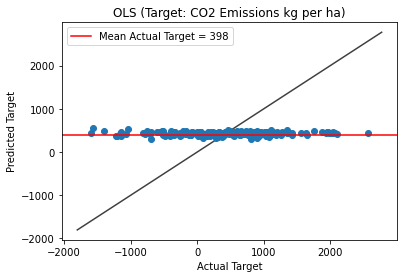

Lasso
MAE on test data: 644.6841203861294


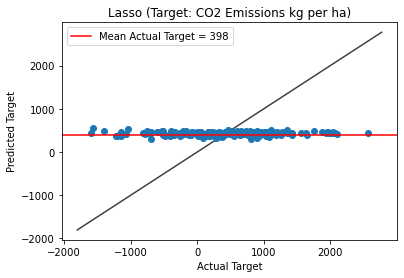

Ridge
MAE on test data: 644.6811365466376


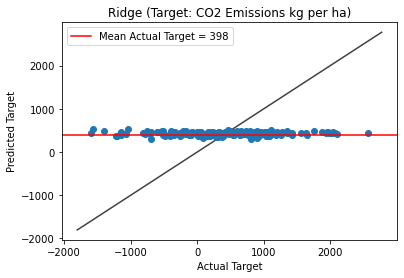

ElasticNet
MAE on test data: 644.6840376401568


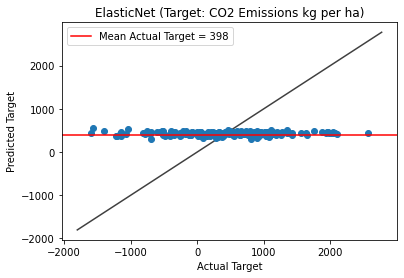

SVR
MAE on test data: 643.7431200143618


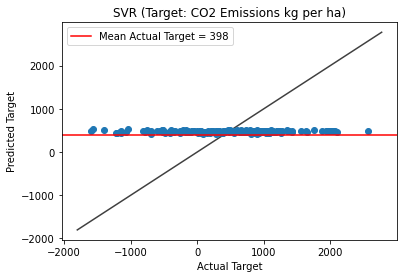

Lightgbm
MAE on test data: 690.6286575092726


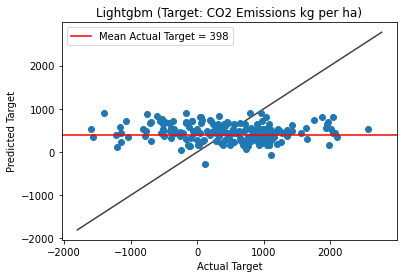

GBR
MAE on test data: 729.0827480181725


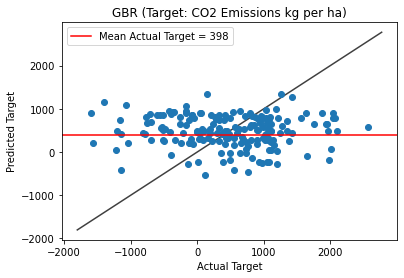

XGBoost
MAE on test data: 713.347237145227


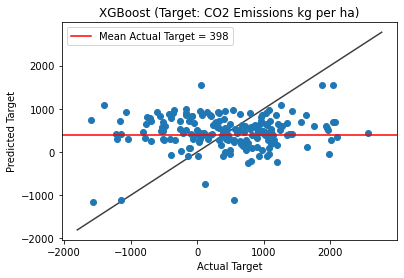

In [41]:
for model_name in model_names:
    print(model_name)
    print('MAE on test data: ' + str(Test_MAE_models[model_names.index(model_name)]))
    inv_transformed_y_actuals = standard_scaler_y.inverse_transform(power_transform_y.inverse_transform(y_test_CO2_kg_per_ha).reshape(-1, 1))
    inv_transformed_preds = standard_scaler_y.inverse_transform(power_transform_y.inverse_transform(fitted_models[model_names.index(model_name)].predict(X_test_CO2_kg_per_ha).reshape(-1,1)))
    fig, ax = plt.subplots()
    ax.axhline(y=mean_CO2_kg_per_ha, color='r', linestyle='-', label = 'Mean Actual Target = ' + str(int(mean_CO2_kg_per_ha)))
    ax.scatter(inv_transformed_y_actuals, inv_transformed_preds)
    lims = [
        np.min([ax.get_xlim(), ax.get_ylim()]),
        np.max([ax.get_xlim(), ax.get_ylim()]),
    ]
    ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
    plt.xlabel('Actual Target')
    plt.ylabel('Predicted Target')
    plt.title(model_name + ' (Target: CO2 Emissions kg per ha)')
    plt.legend()
    plt.show()

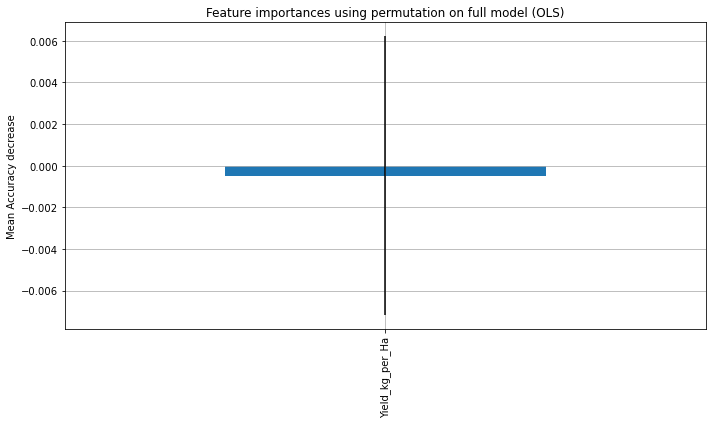

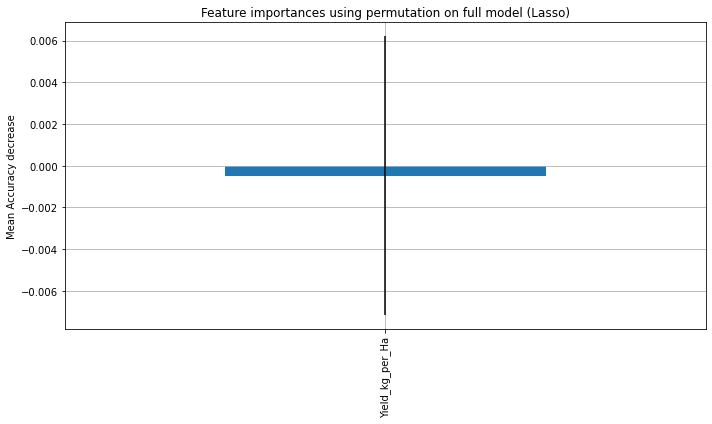

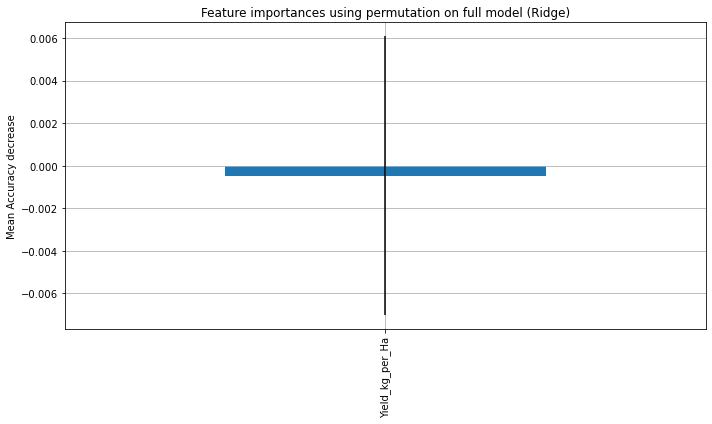

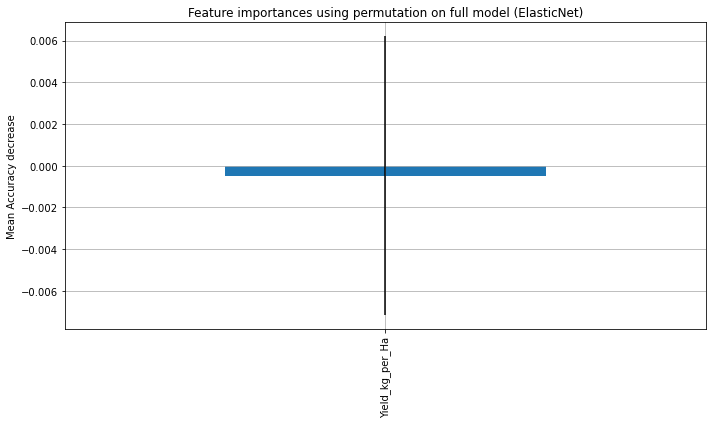

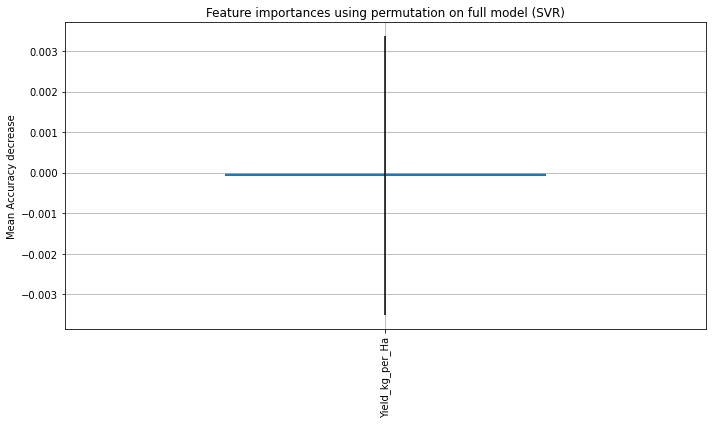

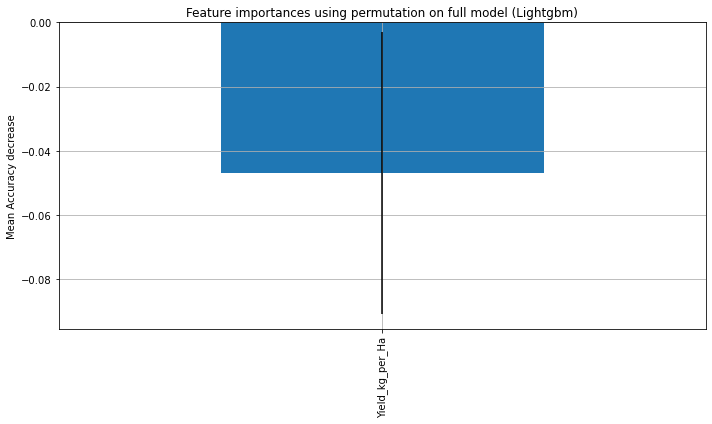

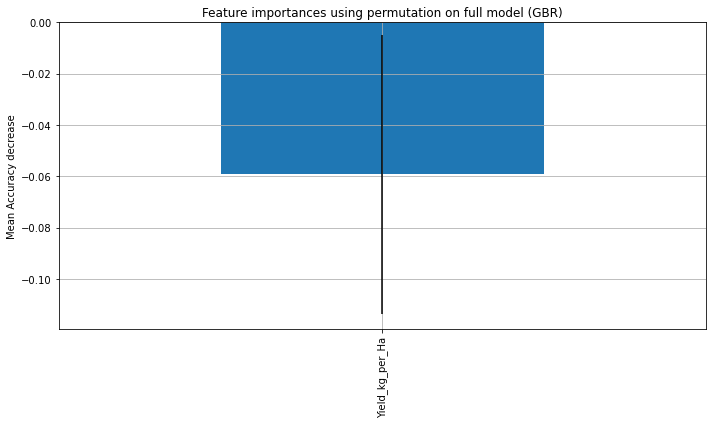

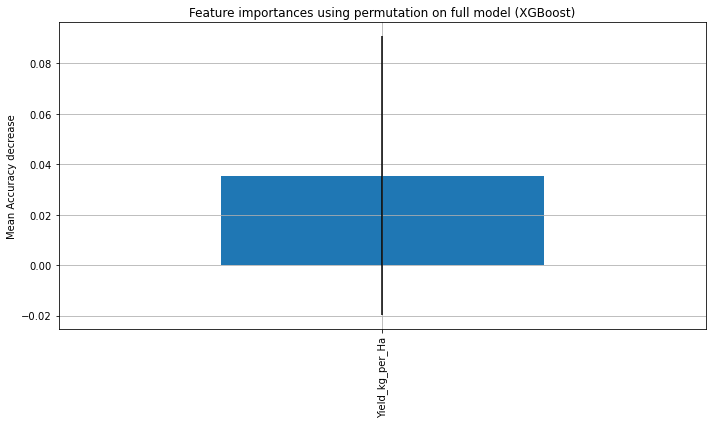

In [42]:
from sklearn.inspection import permutation_importance

for i in range(len(fitted_models)):
    feature_names = train_CO2_kg_per_ha.drop(columns = ['CO2_kg_per_Ha']).columns

    result = permutation_importance(
        fitted_models[i], X_test_CO2_kg_per_ha, y_test_CO2_kg_per_ha, n_repeats=10, random_state=42, n_jobs=2
    )

    model_importances = pd.Series(result.importances_mean, index = feature_names)
    
    fig, ax = plt.subplots(figsize=(10, 6))
    model_importances.plot.bar(yerr = result.importances_std, ax = ax)
    ax.set_title("Feature importances using permutation on full model (" + str(model_names[i]) + ')')
    ax.set_ylabel("Mean Accuracy decrease")
    plt.grid()
    fig.tight_layout()
    plt.show()